In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/NhanDienBienBao

/content/drive/MyDrive/Colab Notebooks/NhanDienBienBao


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/NhanDienBienBao'

In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=2def1a8addcfa957a621542195206735de8cf288e4944ce41a207803327b2393
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = './'

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
train_link = data + 'train.p'
valid_link = data + 'valid.p'
test_link = data + 'test.p'

In [ ]:
import pickle

In [ ]:
with open(train_link, mode = 'rb') as f:
  train = pickle.load(f)

with open(valid_link, mode = 'rb') as f:
  valid = pickle.load(f)

with open(test_link, mode = 'rb') as f:
  test = pickle.load(f)

In [ ]:
trainX = train['features']
trainY = train['labels']

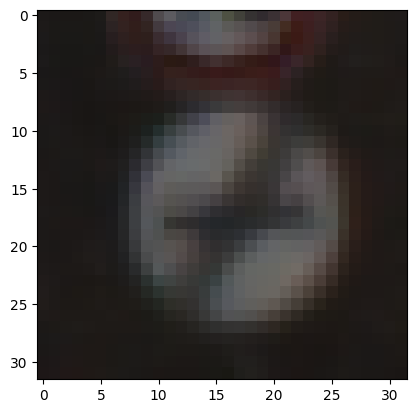

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(trainX[0])

In [ ]:
trainY[0]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
from sklearn.utils import shuffle

trainX, trainY = shuffle(trainX, trainY)

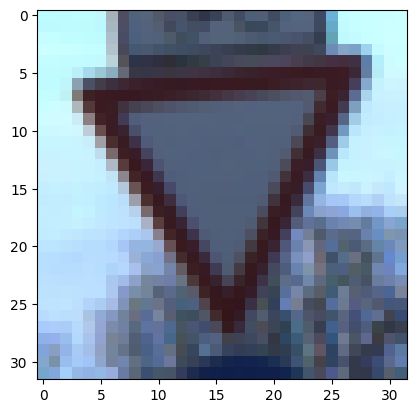

In [ ]:
plt.imshow(trainX[0])

In [ ]:
validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

Chuẩn hóa data point, không bị lệch do khoảng cách giữa các point

In [ ]:
trainX = trainX.astype('float') / 255.0
validX = validX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

Chuyển label về dạng One Hot


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)

## **Xây dựng mạng**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
width = 32
height = 32
classes = 43

shape = (width, height, 3)

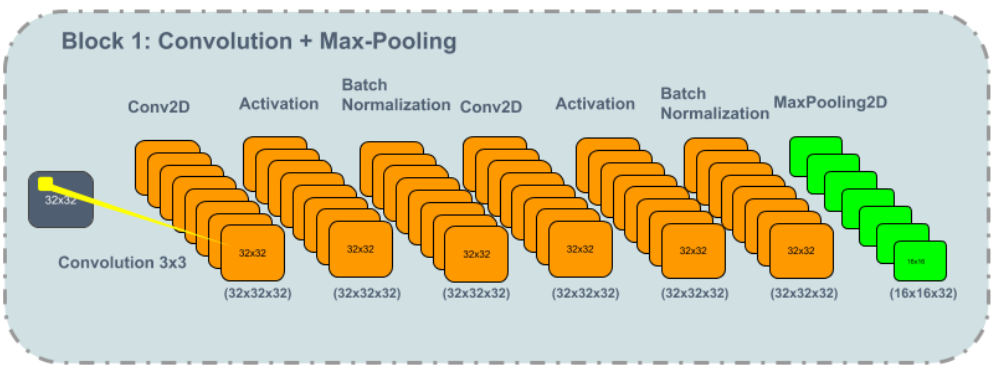

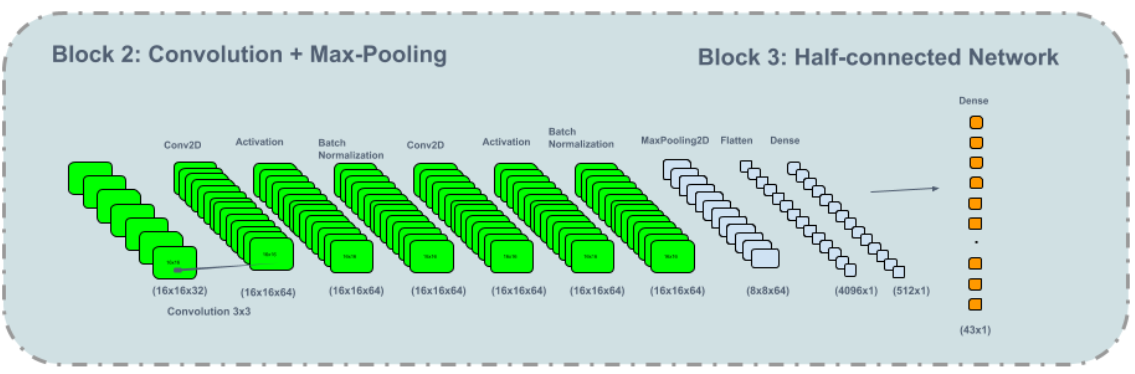

In [42]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected network
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu')) # bat buoc co sau ham dense
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

Tăng cường dữ liệu

In [44]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [45]:
learning_rate = 0.01

In [46]:
epochs = 10
batch_size = 64


In [47]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [48]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


<ipython-input-49-96a4836c8487>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)


543/543 [==============================] - 37s 49ms/step - loss: 2.0159 - accuracy: 0.4207 - val_loss: 1.7846 - val_accuracy: 0.4916
Epoch 2/10
543/543 [==============================] - 27s 49ms/step - loss: 0.7752 - accuracy: 0.7473 - val_loss: 1.9738 - val_accuracy: 0.5299
Epoch 3/10
543/543 [==============================] - 26s 48ms/step - loss: 0.3638 - accuracy: 0.8807 - val_loss: 0.8236 - val_accuracy: 0.7746
Epoch 4/10
543/543 [==============================] - 29s 53ms/step - loss: 0.2290 - accuracy: 0.9253 - val_loss: 0.6378 - val_accuracy: 0.8154
Epoch 5/10
543/543 [==============================] - 25s 47ms/step - loss: 0.1575 - accuracy: 0.9480 - val_loss: 0.5538 - val_accuracy: 0.8508
Epoch 6/10
543/543 [==============================] - 26s 48ms/step - loss: 0.1137 - accuracy: 0.9629 - val_loss: 0.6051 - val_accuracy: 0.8512
Epoch 7/10
543/543 [==============================] - 26s 48ms/step - loss: 0.0910 - accuracy: 0.9704 - val_loss: 0.6316 - val_accuracy: 0.8388
Epo

In [50]:
model.save('mynet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
saved_model = tf.keras.models.load_model("mynet.h5")

In [57]:
result = saved_model.predict(testX[2000:2001]) # train model bang 4 chieu => lay anh thu 2000

1/1 [==============================] - 0s 19ms/step


In [58]:
result

array([[2.2028111e-05, 8.9717920e-05, 6.6470207e-06, 1.4419108e-05,
        1.9459176e-05, 8.8600919e-04, 1.3743466e-03, 1.6397993e-05,
        6.4014376e-04, 4.0544478e-06, 9.5486521e-06, 7.6945034e-06,
        2.7245469e-04, 1.3095447e-05, 1.7485955e-06, 2.6723577e-05,
        6.6869848e-07, 4.2419920e-06, 9.2008813e-06, 8.0915870e-06,
        4.1609186e-05, 1.8897849e-06, 8.1233429e-06, 4.0892588e-05,
        4.8001962e-06, 6.3580987e-06, 1.3797663e-07, 3.9568081e-06,
        8.0109121e-06, 3.4881446e-05, 9.0136348e-07, 6.6628581e-07,
        3.4537625e-05, 5.0399243e-03, 4.5970553e-01, 3.4065139e-01,
        1.5312130e-02, 1.5617129e-02, 4.0029611e-02, 2.7628979e-04,
        1.1895843e-01, 7.8725023e-04, 8.8385068e-06]], dtype=float32)

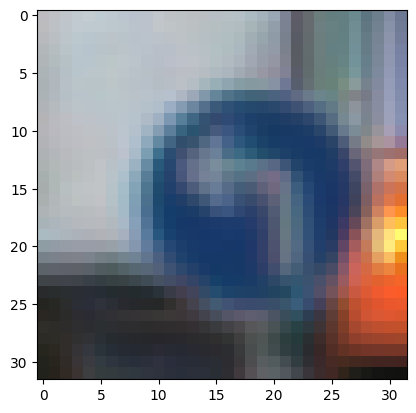

In [61]:
import numpy as np

final = np.argmax(result) # tim max trong ham softmax
final = classNames[final]
plt.imshow(test['features'][2000])

In [62]:
final

'Turn left ahead'